In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("zero-to-mastery-ml-master/data/heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Trying to find patterns

-playing around with different features


In [7]:
res=pd.crosstab(df["target"],df["sex"])

Text(0.5, 0, '1=Disease  0=No Disease')

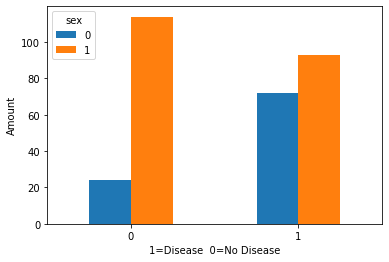

In [8]:
res.plot(kind="bar")

plt.xticks(rotation=0)
plt.ylabel("Amount")
plt.xlabel("1=Disease  0=No Disease")

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


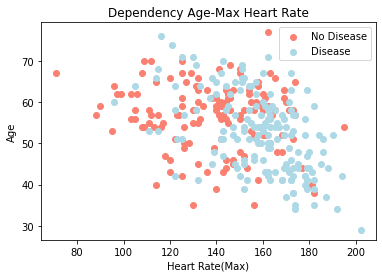

In [10]:
#thalach is the max heartrate

positiv_thalach,pos_age=df.thalach[df.target==1],df.age[df.target==1]
negativ_thalach,neg_age=df.thalach[df.target==0],df.age[df.target==0]

plt.scatter(negativ_thalach,neg_age,color="salmon")
plt.scatter(positiv_thalach,pos_age,color="lightblue")


plt.ylabel("Age")
plt.xlabel("Heart Rate(Max)")
plt.title("Dependency Age-Max Heart Rate")
plt.legend(["No Disease","Disease"])

In [11]:
#comparing chest pain strenght(1 to 4) to target

pd.crosstab(df["target"],df["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


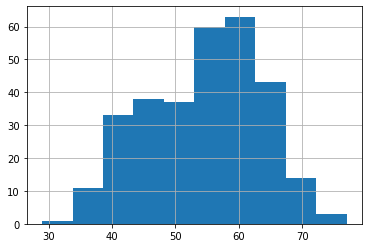

In [12]:
#now lets see the distribution of age and check if there are some outliers with too big values
df.age.hist();

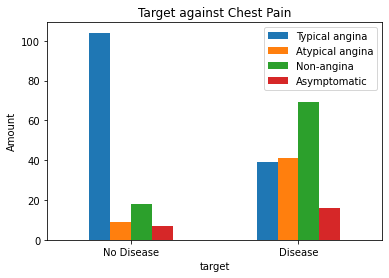

In [13]:
# Lets plot that to bar chart to see data better

pd.crosstab(df["target"],df["cp"]).plot(kind="bar")

plt.ylabel("Amount")
plt.title("Target against Chest Pain")
plt.legend(['Typical angina',"Atypical angina","Non-angina","Asymptomatic"])
plt.xticks(ticks=(0,1),labels=("No Disease","Disease"),rotation=0);

In [14]:
## Now let's check how the features in the dataframe compare to one another

correlation_matrix=df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


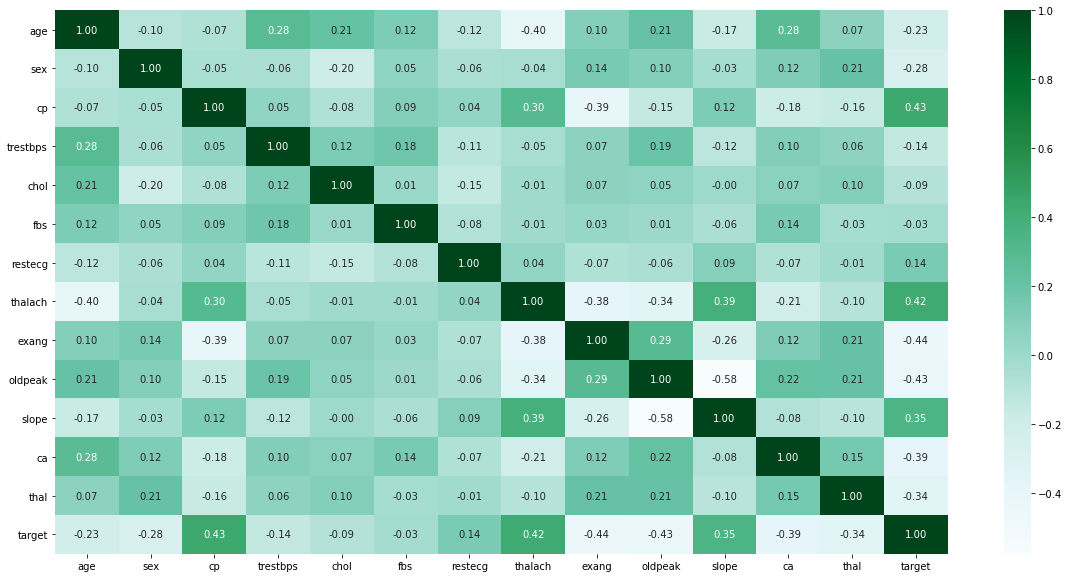

In [15]:
#Let's make this easier to visualize

fig,ax1=plt.subplots(figsize=(20,10))

ax1=sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="BuGn")

In [16]:
# Preparing our data

X=df.drop("target",axis=1)
y=df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [17]:
# Choosing Models

models={"LogRegression":LogisticRegression(),
        "RandomForest":RandomForestClassifier(),
       "KNN": KNeighborsClassifier()}

In [18]:
# Fitting and scoring function Function

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    results={}
    np.random.seed(42)
    
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        score=model.score(X_test,y_test)
        results[name]=score
    return results

D:\Programming\MACHINE_LEARNING\ML_ENV\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


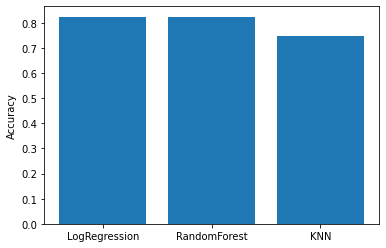

In [19]:
result=fit_and_score(models,X_train,X_test,y_train,y_test)
plt.bar(result.keys(),result.values())
plt.ylabel("Accuracy");

In [20]:
result

{'LogRegression': 0.8241758241758241,
 'RandomForest': 0.8241758241758241,
 'KNN': 0.7472527472527473}

In [21]:
# Let's do some hyperparameter on KNN and see if we can do better

# Changing k-neighbors parameter

range_params=range(1,21)
knn_model=KNeighborsClassifier

train_scores = []
test_scores = []

for i in range_params:
    
    knn_model=KNeighborsClassifier(n_neighbors = i)
    
    knn_model.fit(X_train,y_train)
    
    train_score = knn_model.score(X_train,y_train)
    test_score = knn_model.score(X_test,y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

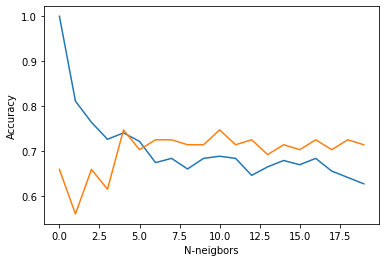

In [22]:
plt.plot(train_scores)
plt.plot(test_scores)
plt.ylabel("Accuracy")
plt.xlabel("N-neigbors");

## Still not better than the other two models

In [23]:
## We will exclude the KNN model and focus on the other 2

In [24]:
## We will use RandomizedSearchCV to further filter the better model

log_params={"C":np.logspace(start=1,stop=20,num=10),
           "class_weight":["balanced",None],
           "solver":["liblinear"]}

forest_params = {"criterion":["gini","entropy"],
                "max_depth": [5,10],
                "min_samples_split":[2,4,8],
                "min_samples_leaf":[2,5,7]}



In [33]:
## For the linear regression
linear_model=LogisticRegression()
random_cv_line=RandomizedSearchCV(linear_model,param_distributions=log_params,n_iter=10,cv=5,verbose=True)
random_cv_line.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e+01, 1.29154967e+03, 1.66810054e+05, 2.15443469e+07,
       2.78255940e+09, 3.59381366e+11, 4.64158883e+13, 5.99484250e+15,
       7.74263683e+17, 1.00000000e+20]),
                                        'class_weight': ['balanced', None],
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
random_cv_line.best_params_
random_cv_line.score(X_test,y_test)

0.7692307692307693

In [35]:
## For the Classifier Tree
forest_classifier=RandomForestClassifier()
random_cv=RandomizedSearchCV(forest_classifier,param_distributions=forest_params,n_iter=10,cv=5)
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10],
                                        'min_samples_leaf': [2, 5, 7],
                                        'min_samples_split': [2, 4, 8]})

In [28]:
random_cv.score(X_test,y_test)

0.8241758241758241

In [29]:
### So the ForestClassifier performs best. Now let's dig deeper with GridSearchCV
grid_cv=GridSearchCV(forest_classifier,param_grid=forest_params,cv=5,verbose=True)
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 4, 8]},
             verbose=True)

In [30]:
grid_cv.score(X_test,y_test)

0.8021978021978022

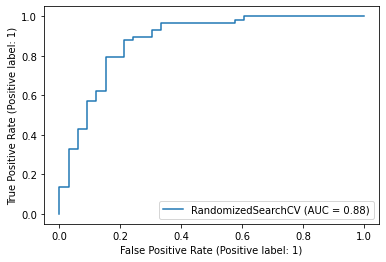

In [39]:
## Now it's time to use different metrics for evaluationg the accuracy of our model

## first using ROC curve

plot_roc_curve(random_cv,X_test,y_test);

In [44]:
## Now with confusion matrix

y_preds=grid_cv.predict(X_test)

In [47]:
matrix=confusion_matrix(y_test,y_preds)

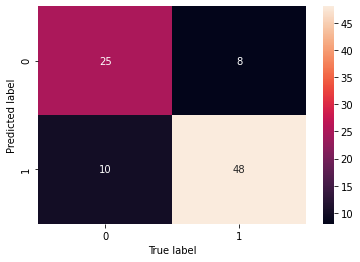

In [52]:
sns.heatmap(matrix,annot=True)

plt.xlabel("True label")
plt.ylabel("Predicted label");

In [100]:
## Now with Cross-Validation. Making a Function to make process easier

def cross_validate_model(model,X,y):
    
    metrics={"f1":"f1","precision":"precision","recall":"recall"}
    
    scores={}
    
    for name,metric in metrics.items():
        cv_score=cross_val_score(estimator=model,
                                   X=X,
                                   y=y,
                                   cv=5,
                                   scoring=metric)
            
        scores[name]=cv_score.mean()
    
    df_scores=pd.DataFrame(scores,index=[1])
    
    return df_scores
        
        

In [101]:
forest_best=grid_cv.best_params_
line_best=random_cv_line.best_params_
forest_model=RandomForestClassifier(**forest_best)
line_model=LogisticRegression(**line_best)

In [102]:
results=cross_validate_model(forest_model,X,series_y)
results

,f1,precision,recall
1,0.843449,0.838119,0.872727


In [103]:
results=cross_validate_model(line_model,X,series_y)
results

,f1,precision,recall
1,0.852127,0.823989,0.884848
